# NHL 2018-2019 Player Data Analysis 
# By: Natan Bienstock

## Introduction
The data set below contains offensive (such as goals, assists, and point) data on players in the National Hockey League during the 2018-19 (current) season. <br>
I have chosen to work with this data because I would like to explore the relationship that minutes per game has on goals per game, and points per game. In other words, the questions I would like to answer with this data are: <br>
    1. Does more minutes per game lead to more goals per game? 
    2. Does more minutes per game lead to more points per game?


In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

%matplotlib notebook

In [2]:
# import the data-set
nhl_18_19 = pd.read_csv('https://raw.githubusercontent.com/ngb0330/DAV-5400/master/Week%207/Player%20Season%20Totals%20-%20Natural%20Stat%20Trick.csv',
                       index_col = 0)

In [3]:
# find number of rows in dataset
nhl_18_19.shape[0]

868

In [4]:
# show first 5 rows of dataset.
nhl_18_19.head()

,Player,Team,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,Faceoffs Won,Faceoffs Lost,Faceoffs %
403,Nikita Kucherov,T.B,R,69,1359.766667,33,77,50,27,110,85.27,206,16.02,0,3,0
165,Patrick Kane,CHI,R,67,1513.016667,40,57,34,23,97,78.86,287,13.94,1,1,50
677,Connor McDavid,EDM,C,64,1466.716667,33,63,47,16,96,82.76,202,16.34,357,403,46.97
78,Sidney Crosby,PIT,C,65,1352.316667,31,56,42,14,87,73.11,189,16.4,808,663,54.93
566,Nathan MacKinnon,COL,C,69,1516.433333,35,52,30,22,87,70.73,297,11.78,448,572,43.92


## Data Summary
The nhl_18_19 dataset that I am using was acquired from www.naturalstattrick.com. <br>
The dataset contains data on 868 players and has the following attributes:
    1. Player - a nominal variable with the player's full name.
    2. Team - a nominal variable with the team(s) the player has played for in the 2018-19 season.
    3. Position - a nominal variable with the position(s) the player has played in the 2018-19 season.
    4. GP - a discrete variable with the number of games the player has played in the 2018-19 season.
    5. TOI - a continuous variable representing that total time (in minutes) that the player has played in the 2018-19 season.
    6. Goals - a discrete variable representing the number of goals the player has scored in the 2018-19 season.
    7. Total Assists - a discrete variable representing the total number of assists the player has accrued in the 2018-19 season.
    8. First Assists - a discrete variable representing the total number of primary assists the player has accrued in the 2018-19 season.
    9. Second Assists - a discrete variable representing the total number of secondary assists the player has accrued in the 2018-19 season.
    10. Total Points - a discrete variable representing the total number of points (goals + assists) the player has accrued in the 2018-19 season.
    11. IPP - a continuous variable representing the Individual Point Percentage (what percentage of a team's goals scored while a player was on the ice, did the player receive a point for) of a player during the 2018-19 season.
    12. Shots - a discrete variable representing the number of shots on goal the player has shot during the 2018-19 season.
    13. SH% - a continuous variable representing the Shot Percentage (percentage of a player's shots that were goals) of a player during the 2018-19 season.
    14. Faceoffs Won - a discrete variable representing the number of faceoffs a player won during the 2018-19 season.
    15. Faceoffs Lost - a discrete variable representing the number of faceoffs a player lost during the 2018-19 season.
    16. Faceoffs % - a continuous variable representing the percentage of faceoffs won by a player during the 2018-19 season.

## Exploratory Data Analysis
### Summary Statistics of Numeric Variables
From the table below, it appears that there is some data missing in the IPP, SH%, and Faceoffs%  variables in the dataset, as those variables don't appear in this table. </br>
    1. By using the value counts function on the IPP category, I found that there are 48 players who don't have an IPP (it is coded as '-'). 
    After replacing the '-' values with Numpy's NaN, I was able to convert the IPP column to numeric values, and 
    calculate summary statistics for the IPP column. 
    2. By using the value counts function on the SH% category, I found that there are 13 players who don't have a 
    SH% (it is coded as '-').
     After replacing the '-' values with Numpy's NaN, I was able to convert the SH% column to numeric values, and  calculate summary statistics for the SH% column. 
    3. By using the value counts function on the Faceoffs % category, I found that there are 321 players who don't 
    have a Faceoffs % (it is coded as '-').
       After replacing the '-' values with Numpy's NaN, I was able to convert the Faceoffs % column to numeric 
       values, and  calculate summary statistics for the Faceoffs % column.
    4. Additionally, based on the minimum values of GP and TOI, it appears that there are some players in the 
    dataset who have barely played in any games (minimum number of games played is 1, and TOI is less than 2 
    minutes). 
    5. The leading goal scorer has 46 goals, more than 4 standard deviations from the mean goals scored by 
    any player. 
    6. The leading point scorer has 110 points, more than 4.5 standard deviations from the mean total points per 
    player. 
    7. There is 1 player with greater than 100% IPP, which does not make sense to me (as IPP is a percentage, the 
    maximum should seemingly be 100%.)

In [5]:
# Provide summary statistics of all numeric variables 
nhl_18_19.describe()

,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,Shots,Faceoffs Won,Faceoffs Lost
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000
mean,43.921659,724.125806,7.322581,12.313364,6.850230,5.463134,19.635945,76.739631,72.511521,72.511521
std,23.357773,473.727301,8.352228,12.556895,7.647702,5.596982,19.664925,60.549761,157.084168,146.084809
min,1.000000,1.866667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,279.291667,1.000000,3.000000,1.000000,1.000000,4.000000,23.000000,0.000000,0.000000
50%,52.000000,766.866667,4.000000,9.000000,5.000000,4.000000,14.000000,70.000000,2.000000,4.000000
75%,65.000000,1101.350000,11.000000,18.000000,10.000000,8.000000,29.000000,113.250000,37.000000,48.000000
max,70.000000,1855.800000,46.000000,77.000000,50.000000,28.000000,110.000000,297.000000,915.000000,805.000000


In [6]:
# Get value counts for IPP column
nhl_18_19['IPP'].value_counts()

-        48
50       45
0        40
33.33    30
66.67    28
100      25
60       16
57.14    12
25       11
75       10
61.54    10
55.56     9
62.5      8
63.64     7
20        6
14.29     6
70        6
83.33     5
64.29     5
28.57     5
61.11     5
53.85     5
30.77     5
37.5      5
40        5
42.86     5
45.45     4
53.33     4
71.43     4
36.84     4
         ..
23.91     1
78.26     1
50.63     1
72        1
60.61     1
61.04     1
58.7      1
43.9      1
38.03     1
55.07     1
43.48     1
24.49     1
72.64     1
26.92     1
29.79     1
48.94     1
62.22     1
65.96     1
34.69     1
38.64     1
67.9      1
8.33      1
60.27     1
54.05     1
21.43     1
70.83     1
42.57     1
68.89     1
44.64     1
48.91     1
Name: IPP, Length: 405, dtype: int64

In [7]:
# replace '-' values in IPP column with Numpy's NaN
nhl_18_19.IPP.replace('-', np.nan, inplace = True)

In [8]:
# confirm that number of nulls is same as number of '-' was
# In other words, replacement worked.
nhl_18_19['IPP'].isnull().sum()

48

In [9]:
# Convert IPP column to numeric.
nhl_18_19['IPP'] = pd.to_numeric(nhl_18_19['IPP'])

In [10]:
# Generate summary statistics for IPP column.
nhl_18_19['IPP'].describe()

count    820.000000
mean      51.538305
std       22.127649
min        0.000000
25%       36.360000
50%       54.305000
75%       66.317500
max      125.000000
Name: IPP, dtype: float64

In [11]:
# Find all players with IPP greater than 100%. 
nhl_18_19[nhl_18_19['IPP'] > 100]

,Player,Team,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,Faceoffs Won,Faceoffs Lost,Faceoffs %
358,Matthew Peca,MTL,C,38,399.616667,3,7,5,2,10,125.0,35,8.57,80,89,47.34


In [12]:
# Get value counts for SH% column.
nhl_18_19['SH%'].value_counts()

0        148
9.09      15
10        14
-         13
16.67     11
8.33      11
7.14      10
5.26       9
4.55       9
4.76       8
6.25       8
7.69       7
14.29      7
20         6
4.35       6
13.04      6
4          6
12.5       6
5          5
3.23       5
5.88       5
8          5
3.85       4
5.56       4
8.11       4
6.67       4
5.41       4
50         4
11.41      3
12         3
        ... 
1.41       1
5.33       1
7.29       1
6.47       1
13.43      1
11.9       1
2.01       1
16.33      1
19.18      1
13.14      1
1.06       1
1.77       1
6.58       1
9.65       1
8.74       1
14.68      1
13.9       1
9.91       1
4.86       1
6.86       1
12.96      1
12.22      1
7          1
3.09       1
2.04       1
4.49       1
1.67       1
5.75       1
3.13       1
9.3        1
Name: SH%, Length: 425, dtype: int64

In [13]:
# Replace '-' values in SH% column with Numpy's NaN
nhl_18_19['SH%'].replace('-', np.nan, inplace = True)
# Confirm that number of null values equals number of '-' values
# In other words replacement worked.
nhl_18_19['SH%'].isnull().sum()

13

In [14]:
# Convert SH% column to numeric.
nhl_18_19['SH%'] = pd.to_numeric(nhl_18_19['SH%'])

In [15]:
# Generate summary statistics for SH% column.
nhl_18_19['SH%'].describe()

count    855.000000
mean       8.238327
std        8.433992
min        0.000000
25%        3.480000
50%        7.500000
75%       11.705000
max      100.000000
Name: SH%, dtype: float64

In [16]:
# Get value counts for Faceoffs % column.
nhl_18_19['Faceoffs %'].value_counts()

-        321
0         51
50        33
33.33     18
100       16
25        12
40        10
28.57      8
44.44      6
20         6
42.86      5
41.67      5
53.85      4
60         4
37.5       4
44.83      3
46.15      3
36.36      3
38.46      3
62.5       3
66.67      3
43.75      3
45.45      3
26.67      3
49.02      3
41.18      3
46.43      2
22.22      2
57.14      2
36         2
        ... 
37.93      1
50.97      1
36.48      1
34.48      1
38.24      1
47.62      1
49.17      1
50.71      1
49.44      1
43.53      1
56.36      1
54.11      1
41.86      1
51.79      1
37.21      1
47.67      1
43.86      1
52.97      1
48.98      1
50.4       1
51.32      1
48         1
47.08      1
59.17      1
57.38      1
57.53      1
83.33      1
50.96      1
54.31      1
44.25      1
Name: Faceoffs %, Length: 317, dtype: int64

In [17]:
# Replace '-' values in Faceoffs % column with Numpy's NaN
nhl_18_19['Faceoffs %'].replace('-', np.nan, inplace = True)
# Confirm that number of null values equals number of '-' values
# In other words replacement worked.
nhl_18_19['Faceoffs %'].isnull().sum()

321

In [18]:
# Convert Faceoffs % column to numeric.
nhl_18_19['Faceoffs %'] = pd.to_numeric(nhl_18_19['Faceoffs %'])

In [19]:
# Generate summary statistcs of Faceoffs % column.
nhl_18_19['Faceoffs %'].describe()

count    547.000000
mean      42.149342
std       19.484806
min        0.000000
25%       34.550000
50%       45.450000
75%       51.430000
max      100.000000
Name: Faceoffs %, dtype: float64

### Player Column
By using the describe function to generate summary statistics on the player column, we can see that there are no player names missing from the dataset, and that there are no duplicates of any player in the dataset.

In [20]:
# Generate summary statistics for Player column.
nhl_18_19['Player'].describe()

count             868
unique            868
top       Ryan Kesler
freq                1
Name: Player, dtype: object

### Team Column
By getting the value counts of the Team column, it appears that ANA (Anaheim Ducks) have the most players in the dataset with 32 (teams can only have 20 players dressed per game) and TOR (Toronto Maple Leafs) had the fewest number of players with 21. <br>
However, the value counts also show that there are some players with multiple teams, so the counts are not accurate. <br>
I used the str.split() method to split the team column into different columns, every time it saw a comma, and saved the result into a new variable called teams. <br>
I then used the melt function to recombine these multiple columns into one column. <br>
Then I called the value counts function again, and found that ANA again had the most players, but this time has 44 players and T.B (Tampa Bay Lightning) had the fewest number of players with 24. <br>
I then used the bar plot functionality of both mathplotlib and seaborn to create bar plots of this corrected team data. <br>

In [21]:
# Generate value counts for Team column.
nhl_18_19['Team'].value_counts()

ANA              32
OTT              30
STL              29
BOS              29
N.J              29
COL              29
DAL              28
FLA              27
CGY              27
CBJ              27
EDM              27
NYI              26
BUF              26
L.A              26
ARI              26
CAR              25
MTL              25
DET              25
VAN              25
NYR              24
NSH              24
S.J              24
CHI              23
WSH              23
WPG              23
PHI              23
VGK              23
T.B              22
MIN              22
TOR              21
                 ..
TOR, VAN          1
ANA, MIN          1
ANA, OTT          1
COL, FLA, PIT     1
BOS, EDM          1
BOS, DAL          1
L.A, MTL          1
OTT, VAN          1
BOS, N.J          1
BUF, WPG          1
FLA, S.J          1
ARI, MTL, PHI     1
EDM, NYR, VAN     1
PIT, VAN          1
L.A, PIT, VAN     1
DAL, PIT          1
EDM, NYR          1
ANA, VAN          1
N.J, NSH          1


In [22]:
# split the Team column into multiple columns wherever there is a comma.
team = nhl_18_19['Team'].str.split(',', expand = True)
# Recombine the team columns into 1 column.
team = team.melt()
# Set the value counts of the team variable.
team_counts = team['value'].str.strip().value_counts()
# Display the value counts.
team_counts

ANA    44
OTT    38
N.J    36
EDM    36
DAL    35
BOS    34
FLA    34
VAN    34
MIN    32
L.A    32
NSH    32
PIT    32
CBJ    31
NYR    31
CHI    30
ARI    30
STL    30
COL    30
MTL    30
CAR    29
BUF    29
PHI    28
WPG    28
DET    28
CGY    28
VGK    27
NYI    26
WSH    26
S.J    26
TOR    25
T.B    24
Name: value, dtype: int64

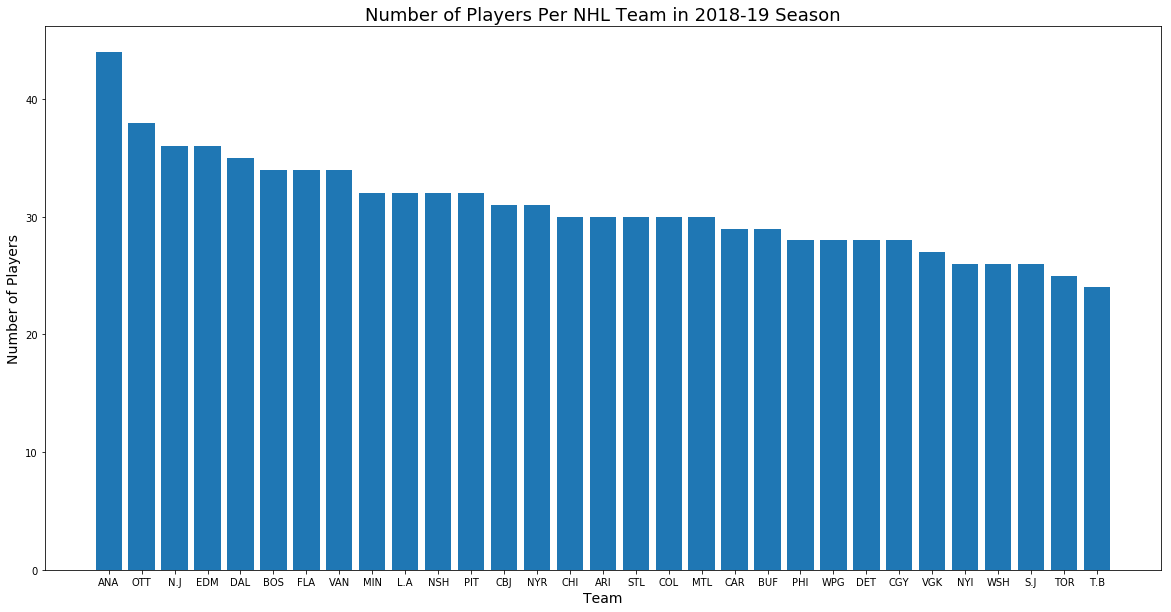

In [23]:
# Set the figure size to be 20 by 10.
plt.figure(figsize=(20,10))
# Make a bar chart of the updated team data using pyplot's bar method.
plt.bar(team_counts.index,team_counts.values)
# Set the title and axis labels for the bar plot.
plt.title('Number of Players Per NHL Team in 2018-19 Season', fontsize = 18)
plt.xlabel('Team', fontsize = 14)
plt.ylabel('Number of Players', fontsize = 14);

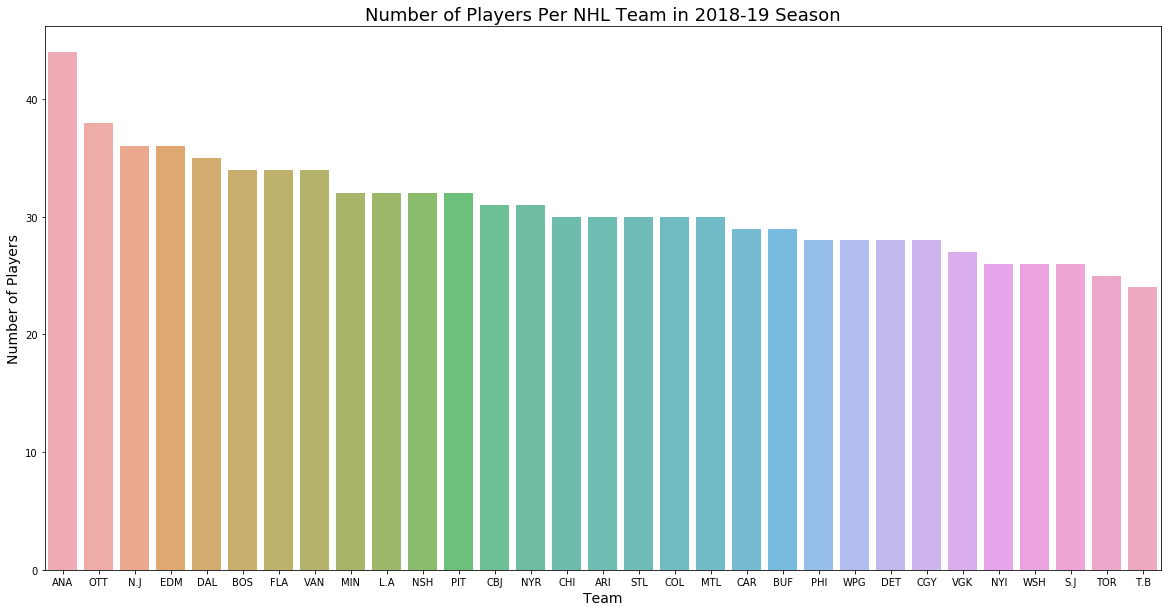

In [24]:
# Set the figure size to be 20 by 10.
plt.figure(figsize = (20,10))
# Make a bar plot of updated team data using seaborn's barplot method.
sns.barplot(x = team_counts.index, y = team_counts.values, alpha = 0.8);
# Set the title and axis labels of the bar plot.
plt.title('Number of Players Per NHL Team in 2018-19 Season', fontsize = 18)
plt.xlabel('Team', fontsize = 14)
plt.ylabel('Number of Players', fontsize = 14);

### Position Column
By getting the value counts of the Position column, it appears that D (Defenseman) has the most players in the dataset, and R (Right Wing) has the fewest players in the dataset.
However, the value counts also show that there are some players with multiple positions, so the counts are not accurate. <br>
I used the str.split() method to split the position column into different columns, every time it saw a comma, and saved the result into a new variable called positions. <br>
I then used the melt function to recombine these multiple columns into one column. <br>
Then I called the value counts function again, and found that D  had the same number of players, and R still had the fewest number of player, but with 140 not 126. <br>
I then used the bar plot functionality of both mathplotlib and seaborn to create bar plots of this corrected position data. <br>

In [25]:
# Show value counts of Position column.
nhl_18_19['Position'].value_counts()

D       305
C       258
L       146
R       126
C, L     19
C, R     12
L, R      2
Name: Position, dtype: int64

In [26]:
# split the Position column into multiple columns wherever there is a comma.
position = nhl_18_19['Position'].str.split(',', expand = True)
# recombine the position columns into 1 column.
position = position.melt()
# Find the value counts for the new position column.
position_counts = position['value'].str.strip().value_counts()
# Display the value counts.
position_counts

D    305
C    289
L    167
R    140
Name: value, dtype: int64

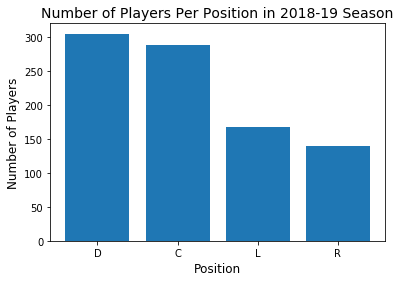

In [27]:
# Create the bar plot of the new Position column using matplotlib's bar method
plt.bar(position_counts.index, position_counts.values)
# Set the title and label the axes of the bar plot.
plt.title('Number of Players Per Position in 2018-19 Season', fontsize = 14)
plt.xlabel('Position', fontsize = 12)
plt.ylabel('Number of Players', fontsize = 12);

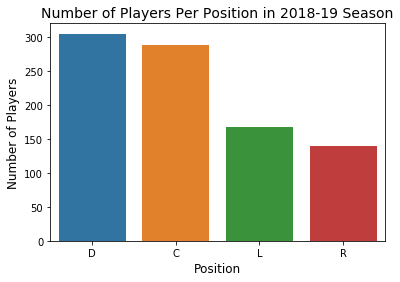

In [28]:
# Create the bar plot of the new Position column using seaborn's barplot method
sns.barplot(x = position_counts.index, y= position_counts.values)
# Set the title and label the axes of the bar plot. 
plt.title('Number of Players Per Position in 2018-19 Season', fontsize = 14)
plt.xlabel('Position', fontsize = 12)
plt.ylabel('Number of Players', fontsize = 12);

### GP (Games Played) Column
I created a box plot and a histogram of the Games Played column using both mathplotlib and seaborn. <br>
From the box plot, I was able to see that the median is greater than 50 (approximately 53), which is greater than the mean. <br> 
This means that the data is left (or negative) skewed, which can also be seen on the histogram. <br>
It is clear from the histogram that more than 250 players have played between 60 and 70 games, and that the data is not normally distributed.

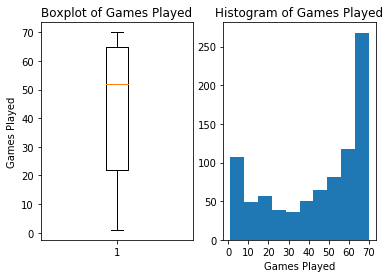

In [29]:
# define a new figure for plotting
plt.figure(1)

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(121)

# create the box plot
plt.boxplot(nhl_18_19['GP'])

# label the box plot
plt.title('Boxplot of Games Played')
plt.xlabel(' ')
plt.ylabel('Games Played')

# now define the subplot that will appear on the righthand side of our 1x2
plt.subplot(122)

# create the histogram
plt.hist(nhl_18_19['GP'])

# label the histogram
plt.title('Histogram of Games Played')
plt.xlabel('Games Played')

# specify the number of bins to use in the histogram
plt.locator_params(nbins=10, axis = 'x')

# show the plots
plt.show()

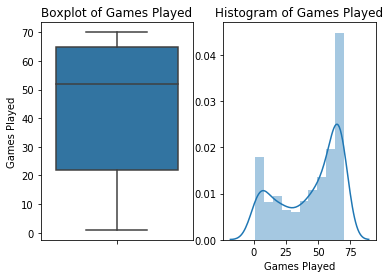

In [71]:
# define a new figure for plotting
plt.figure(1)
# define the plot that will appear on the left side
plt.subplot(121)
# create the box plot
sns.boxplot(nhl_18_19['GP'], orient = 'v')
# set the title for the box plot
plt.title('Boxplot of Games Played')
# clear the x label of box plot
plt.xlabel(' ')
plt.ylabel('Games Played')
# define the plot that will appear on the right side
plt.subplot(122)
# create the histogram
sns.distplot(nhl_18_19['GP'], bins = 10)
# set the title for the histogram
plt.title('Histogram of Games Played')
plt.xlabel('Games Played')
# show the plots
plt.show();

### TOI (Time on Ice) Column
I created a histogram and a box plot of the TOI data using both mathplotlib and seaborn. <br>
From the box plot, I was able to see that the median is about 750 minutes, which is more than the mean. <br>
This implies that the data has left (or negative) skew, which can also be seen on the histogram. <br>
The histogram also shows that the data is not normally distributed.

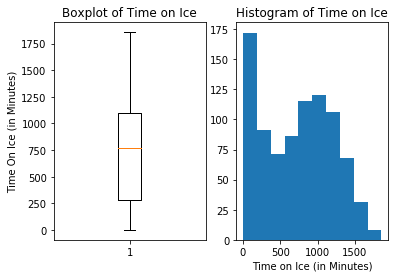

In [31]:
# define a new figure for plotting
plt.figure(1)

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(121)

# create the box plot
plt.boxplot(nhl_18_19['TOI'])

# label the box plot
plt.title('Boxplot of Time on Ice')
plt.xlabel(' ')
plt.ylabel('Time On Ice (in Minutes)')

# now define the subplot that will appear on the righthand side of our 1x2
plt.subplot(122)

# create the histogram
plt.hist(nhl_18_19['TOI'])

# label the histogram
plt.title('Histogram of Time on Ice')
plt.xlabel('Time on Ice (in Minutes)')

# specify the number of bins to use in the histogram
plt.locator_params(nbins=8, axis = 'x')

# show the plots
plt.show()

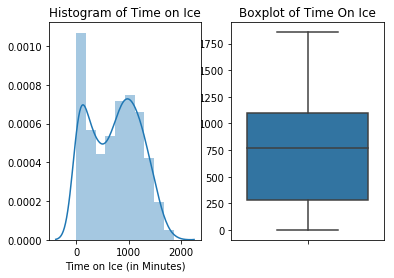

In [32]:
# define a new figure for plotting
plt.figure(1)
# define the plot that will appear on the right side
plt.subplot(122)
# create the box plot
sns.boxplot(nhl_18_19['TOI'], orient = 'v')
# set the title for the box plot
plt.title('Boxplot of Time On Ice')
# clear the x label of box plot
plt.xlabel(' ')
plt.ylabel('Time on Ice (in Minutes)')
# define the plot that will appear on the left side
plt.subplot(121)
# create the histogram
sns.distplot(nhl_18_19['TOI'], bins = 10)
# set the title for the histogram
plt.title('Histogram of Time on Ice')
plt.xlabel('Time on Ice (in Minutes)')
# show the plots
plt.show();

### Goals Column
I created a histogram and a boxplot of the Goals column in the dataset. <br>
From the boxplot, it seems like the median is about 5 goals, which is less than the mean. <br>
This means that the data is right (positively) skewed, which can also be seen from the histogram. <br>
The boxplot also shows that there are a lot of players who have scored more goals than the upper bound of the boxplot (more than 1.5 x the IQR). <br>
While the data is not normally distributed, it is unimodal as shown by the histogram.

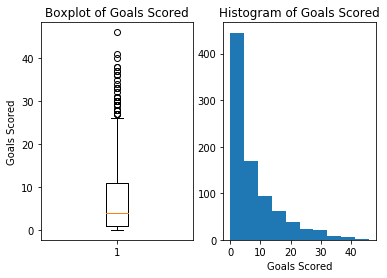

In [33]:
# define a new figure for plotting
plt.figure(1)

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(121)

# create the box plot
plt.boxplot(nhl_18_19['Goals'])

# label the box plot
plt.title('Boxplot of Goals Scored')
plt.xlabel(' ')
plt.ylabel('Goals Scored')

# now define the subplot that will appear on the righthand side of our 1x2
plt.subplot(122)

# create the histogram
plt.hist(nhl_18_19['Goals'])

# label the histogram
plt.title('Histogram of Goals Scored')
plt.xlabel('Goals Scored')

# specify the number of bins to use in the histogram
plt.locator_params(nbins=10, axis = 'x')

# show the plots
plt.show()

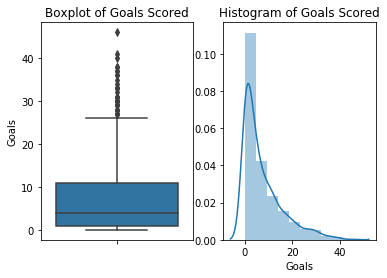

In [34]:
# define a new figure for plotting
plt.figure(1)
# define the plot that will appear on the left side
plt.subplot(121)
# create the box plot
sns.boxplot(nhl_18_19['Goals'], orient = 'v')
# set the title for the box plot
plt.title('Boxplot of Goals Scored')
# clear the x label of box plot
plt.xlabel(' ')
# define the plot that will appear on the right side
plt.subplot(122)
# create the histogram
sns.distplot(nhl_18_19['Goals'], bins = 10)
# set the title for the histogram
plt.title('Histogram of Goals Scored')
# show the plots
plt.show();

### Total Assists Column
I created a boxplot and histogram of the Total Assists column using both mathplotlib and seaborn. <br>
From the boxplot, it appears that the median number of total assists is about 9, which is less than the mean. <br>
This means that the data is right (positively) skewed as shown in the histogram. <br>
The boxplot also shows that there are a significant number of players who have more total assists than the upper bound of the boxplot. <br>
The histogram shows that the data is not normally distributed, but is unimodal.

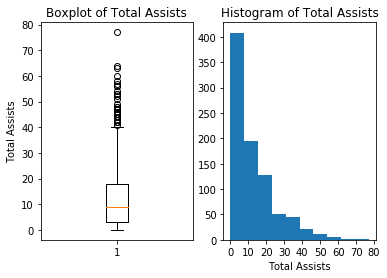

In [35]:
# define a new figure for plotting
plt.figure(1)

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(121)

# create the box plot
plt.boxplot(nhl_18_19['Total Assists'])

# label the box plot
plt.title('Boxplot of Total Assists')
plt.xlabel(' ')
plt.ylabel('Total Assists')

# now define the subplot that will appear on the righthand side of our 1x2
plt.subplot(122)

# create the histogram
plt.hist(nhl_18_19['Total Assists'])

# label the histogram
plt.title('Histogram of Total Assists')
plt.xlabel('Total Assists')

# specify the number of bins to use in the histogram
plt.locator_params(nbins=10, axis = 'x')

# show the plots
plt.show()

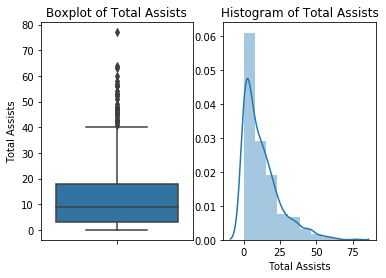

In [36]:
# define a new figure for plotting
plt.figure(1)
# define the plot that will appear on the left side
plt.subplot(121)
# create the box plot
sns.boxplot(nhl_18_19['Total Assists'], orient = 'v')
# set the title for the box plot
plt.title('Boxplot of Total Assists')
# clear the x label of box plot
plt.xlabel(' ')
# define the plot that will appear on the right side
plt.subplot(122)
# create the histogram
sns.distplot(nhl_18_19['Total Assists'], bins = 10)
# set the title for the histogram
plt.title('Histogram of Total Assists')
# show the plots
plt.show();

### First Assists Column
I created a histogram and a boxplot to explore the First Assists column using both mathplotlib and seaborn. <br>
From the boxplot, it appears that the median is about 5, which is less than the mean. <br>
This means that the data is right (positively) skewed as shown in the histogram. <br>
There are also a significant number of players with more primary assists than the upper bound of the boxplot. <br>
The histogram shows that the data is not normally distributed, but is unimodal, with the mode between 0-5 assists.

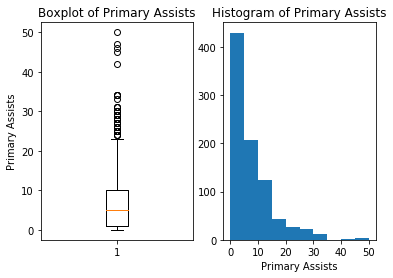

In [37]:
# define a new figure for plotting
plt.figure(1)

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(121)

# create the box plot
plt.boxplot(nhl_18_19['First Assists'])

# label the box plot
plt.title('Boxplot of Primary Assists')
plt.xlabel(' ')
plt.ylabel('Primary Assists')

# now define the subplot that will appear on the righthand side of our 1x2
plt.subplot(122)

# create the histogram
plt.hist(nhl_18_19['First Assists'])

# label the histogram
plt.title('Histogram of Primary Assists')
plt.xlabel('Primary Assists')

# specify the number of bins to use in the histogram
plt.locator_params(nbins=10, axis = 'x')

# show the plots
plt.show()

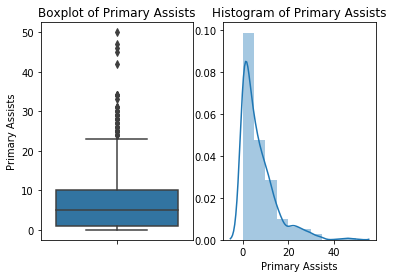

In [38]:
# define a new figure for plotting
plt.figure(1)
# define the plot that will appear on the left side
plt.subplot(121)
# create the box plot
sns.boxplot(nhl_18_19['First Assists'], orient = 'v')
# set the title for the box plot
plt.title('Boxplot of Primary Assists')
# clear the x label of box plot
plt.xlabel(' ')
plt.ylabel('Primary Assists')
# define the plot that will appear on the right side
plt.subplot(122)
# create the histogram
sns.distplot(nhl_18_19['First Assists'], bins = 10)
# set the title for the histogram
plt.title('Histogram of Primary Assists')
plt.xlabel('Primary Assists')
# show the plots
plt.show();

### Second Assists Column
I created a histogram and boxplot of the second assists column using both mathplotlib and seaborn. <br>
From the boxplot, it appears that the median is 4, which is less than the mean. <br>
This means that the data is right (positively) skewed as seen in the histogram. <br>
The boxplot also shows that there is a significant number of players with more secondary assists than the upper bounds of the boxplot. <br>
From the histogram, it is clear that the data is not normally distributed, but is unimodal with the mode being between 0-5 secondary assists.


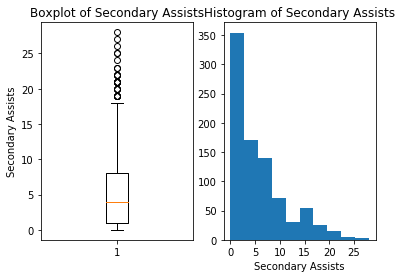

In [39]:
# define a new figure for plotting
plt.figure(1)

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(121)

# create the box plot
plt.boxplot(nhl_18_19['Second Assists'])

# label the box plot
plt.title('Boxplot of Secondary Assists')
plt.xlabel(' ')
plt.ylabel('Secondary Assists')

# now define the subplot that will appear on the righthand side of our 1x2
plt.subplot(122)

# create the histogram
plt.hist(nhl_18_19['Second Assists'])

# label the histogram
plt.title('Histogram of Secondary Assists')
plt.xlabel('Secondary Assists')

# specify the number of bins to use in the histogram
plt.locator_params(nbins=10, axis = 'x')

# show the plots
plt.show()

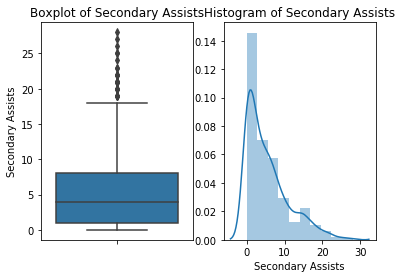

In [40]:
# define a new figure for plotting
plt.figure(1)
# define the plot that will appear on the left side
plt.subplot(121)
# create the box plot
sns.boxplot(nhl_18_19['Second Assists'], orient = 'v')
# set the title for the box plot
plt.title('Boxplot of Secondary Assists')
# clear the x label of box plot
plt.xlabel(' ')
plt.ylabel('Secondary Assists')
# define the plot that will appear on the right side
plt.subplot(122)
# create the histogram
sns.distplot(nhl_18_19['Second Assists'], bins = 10)
# set the title for the histogram
plt.title('Histogram of Secondary Assists')
plt.xlabel('Secondary Assists')
# show the plots
plt.show();

### Total Points Column
I created a boxplot and a histogram to show the distribution of the Total Points column using both mathplotlib and seaborn. <br>
From the boxplot, the median appears to be about 15 points, which is less than the mean. <br>
This means that the data is right (positively) skewed which can also be seen from the histogram. <br>
The boxplot also shows that there are a significant number of players with more total points than the upper bounds of the boxplot. <br>
From the histogram, it is clear that the data is unimodal but not normally distributed with more than 40% of the players having between 0-10 points. 

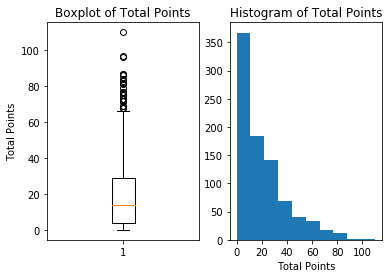

In [41]:
# define a new figure for plotting
plt.figure(1)

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(121)

# create the box plot
plt.boxplot(nhl_18_19['Total Points'])

# label the box plot
plt.title('Boxplot of Total Points')
plt.xlabel(' ')
plt.ylabel('Total Points')

# now define the subplot that will appear on the righthand side of our 1x2
plt.subplot(122)

# create the histogram
plt.hist(nhl_18_19['Total Points'])

# label the histogram
plt.title('Histogram of Total Points')
plt.xlabel('Total Points')

# specify the number of bins to use in the histogram
plt.locator_params(nbins=10, axis = 'x')

# show the plots
plt.show()

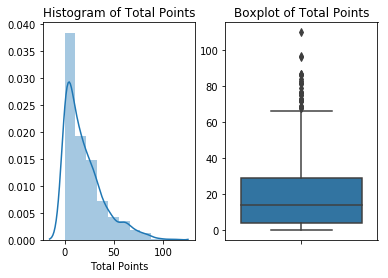

In [42]:
# define a new figure for plotting
plt.figure(1)
# define the plot that will appear on the right side
plt.subplot(122)
# create the box plot
sns.boxplot(nhl_18_19['Total Points'], orient = 'v')
# set the title for the box plot
plt.title('Boxplot of Total Points')
# clear the x label of box plot
plt.xlabel(' ')
# define the plot that will appear on the left side
plt.subplot(121)
# create the histogram
sns.distplot(nhl_18_19['Total Points'], bins = 10)
# set the title for the histogram
plt.title('Histogram of Total Points')
# show the plots
plt.show();

### IPP (Individual Points Percentage) Column 
To explore the IPP column, I created a histogram using mathplotlib and seaborn.<br> 
The histogram shows that the IPP data in unimodal and not normally distributed. <br>
Also, I found the median of the IPP column to be 54.05 which is greater than the mean. <br>
This implies that the data is left (negatively) skewed, which is hard to see from the histogram. 

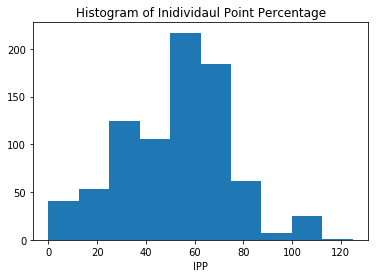

In [72]:
# create the histogram using hist method of mathplotlib
plt.hist(nhl_18_19['IPP'])

# label the histogram
plt.title('Histogram of Inidividaul Point Percentage')
plt.xlabel('IPP')

# specify the number of bins to use in the histogram
plt.locator_params(nbins=10, axis = 'x')

# show the plots
plt.show()

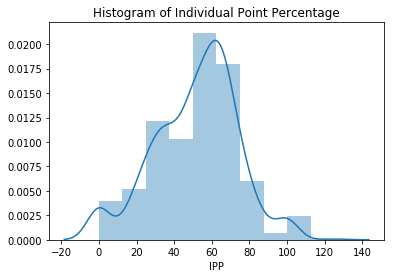

In [73]:
# create the histogram using distplot method of seaborn
sns.distplot(nhl_18_19['IPP'], bins = 10)
# set the title for the histogram
plt.title('Histogram of Individual Point Percentage')
# show the plots
plt.show();

In [45]:
# Find the median of the IPP column
nhl_18_19.IPP.median()

54.305

### Shots Column
I created a histogram and a boxplot to explore the Shots column using both mathplotlib and seaborn. <br>
From the boxplot, it appears that the median is about 70, which is less than the mean. <br>
This means that the data is right (positively) skewed, as shown by the histogram. <br>
There are also at least 10 players with more shots on goal than the upper bound of the boxplot. <br>
The histogram shows that the data is not normally distributed. <br>

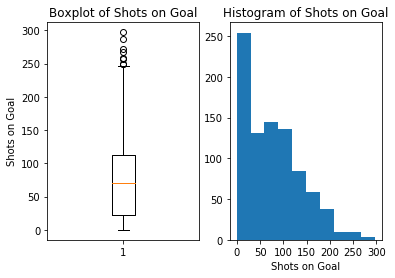

In [46]:
# define a new figure for plotting
plt.figure(1)

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(121)

# create the box plot
plt.boxplot(nhl_18_19['Shots'])

# label the box plot
plt.title('Boxplot of Shots on Goal')
plt.xlabel(' ')
plt.ylabel('Shots on Goal')

# now define the subplot that will appear on the righthand side of our 1x2
plt.subplot(122)

# create the histogram
plt.hist(nhl_18_19['Shots'])

# label the histogram
plt.title('Histogram of Shots on Goal')
plt.xlabel('Shots on Goal')

# specify the number of bins to use in the histogram
plt.locator_params(nbins=10, axis = 'x')

# show the plots
plt.show()

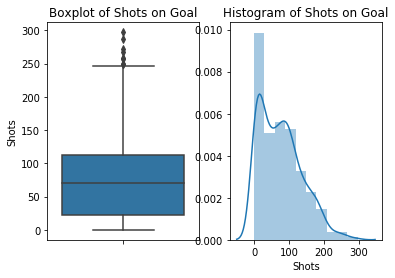

In [47]:
# define a new figure for plotting
plt.figure(1)
# define the plot that will appear on the left side
plt.subplot(121)
# create the box plot
sns.boxplot(nhl_18_19['Shots'], orient = 'v')
# set the title for the box plot
plt.title('Boxplot of Shots on Goal')
# clear the x label of box plot
plt.xlabel(' ')
# define the plot that will appear on the right side
plt.subplot(122)
# create the histogram
sns.distplot(nhl_18_19['Shots'], bins = 10)
# set the title for the histogram
plt.title('Histogram of Shots on Goal')
# show the plots
plt.show();

### SH% Column
I created a histogram to explore the SH% column using both mathplotlib and seaborn. <br>
The histogram shows that the data is unimodal with the mode between 0-10 percent of shots scored (SH %). <br>
The histogram also shows that there are some outliers, with 1 player with an 100% shots scored percentage. <br>

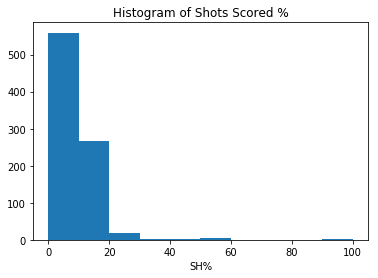

In [48]:
# create the histogram of SH% using hist method of mathplotlib.
plt.hist(nhl_18_19['SH%'])

# label the histogram
plt.title('Histogram of Shots Scored %')
plt.xlabel('SH%');

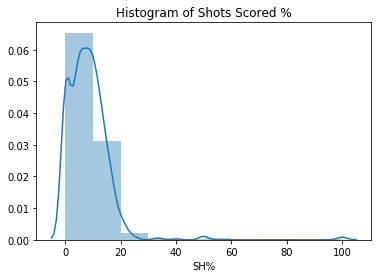

In [49]:
# create the histogram of SH% column using distplot method of seaborn.
sns.distplot(nhl_18_19['SH%'], bins = 10)
# set the title for the histogram
plt.title('Histogram of Shots Scored %')
# show the plots
plt.show();

### Faceoffs Won Column
I created both a histogram and a boxplot to explore the Faceoffs Won column using both mathplotlib and seaborn. <br>
The boxplot shos a tremendous amount (most) of the data is more than the upper bounds of the boxplot. <br>
The median is close to zero which is significantly less than the mean, meaning the data is positively skewed. <br>
The histogram shows that the data is unimodal but not normally distributed. 

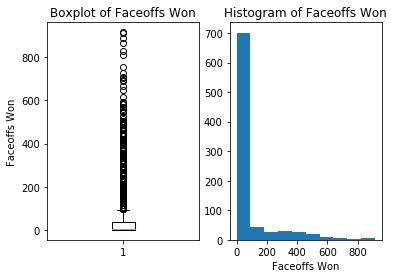

In [50]:
# define a new figure for plotting
plt.figure(1)

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(121)

# create the box plot
plt.boxplot(nhl_18_19['Faceoffs Won'])

# label the box plot
plt.title('Boxplot of Faceoffs Won')
plt.xlabel(' ')
plt.ylabel('Faceoffs Won')

# now define the subplot that will appear on the righthand side of our 1x2
plt.subplot(122)

# create the histogram
plt.hist(nhl_18_19['Faceoffs Won'])

# label the histogram
plt.title('Histogram of Faceoffs Won')
plt.xlabel('Faceoffs Won')

# specify the number of bins to use in the histogram
plt.locator_params(nbins=10, axis = 'x')

# show the plots
plt.show()

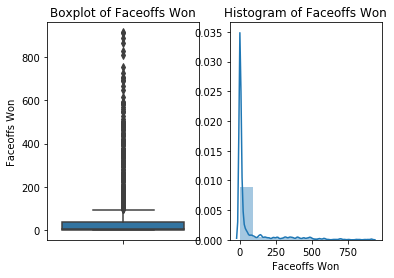

In [51]:
# define a new figure for plotting
plt.figure(1)
# define the plot that will appear on the left side
plt.subplot(121)
# create the box plot
sns.boxplot(nhl_18_19['Faceoffs Won'], orient = 'v')
# set the title for the box plot
plt.title('Boxplot of Faceoffs Won')
# clear the x label of box plot
plt.xlabel(' ')
# define the plot that will appear on the right side
plt.subplot(122)
# create the histogram
sns.distplot(nhl_18_19['Faceoffs Won'], bins = 10)
# set the title for the histogram
plt.title('Histogram of Faceoffs Won')
# show the plots
plt.show();

### Faceoffs Lost Column
I created both a histogram and a boxplot to explore the Faceoffs Lost column using both mathplotlib and seaborn. <br>
The boxplot shos a tremendous amount (most) of the data is more than the upper bounds of the boxplot. <br>
The median is close to zero which is significantly less than the mean, meaning the data is positively skewed. <br>
The histogram shows that the data is unimodal but not normally distributed. 

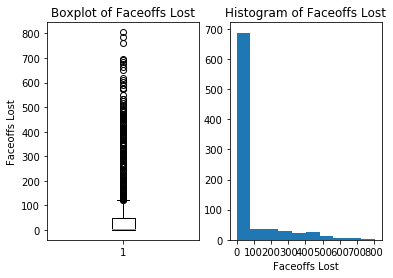

In [52]:
# define a new figure for plotting
plt.figure(1)

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(121)

# create the box plot
plt.boxplot(nhl_18_19['Faceoffs Lost'])

# label the box plot
plt.title('Boxplot of Faceoffs Lost')
plt.xlabel(' ')
plt.ylabel('Faceoffs Lost')

# now define the subplot that will appear on the righthand side of our 1x2
plt.subplot(122)

# create the histogram
plt.hist(nhl_18_19['Faceoffs Lost'])

# label the histogram
plt.title('Histogram of Faceoffs Lost')
plt.xlabel('Faceoffs Lost')

# specify the number of bins to use in the histogram
plt.locator_params(nbins=10, axis = 'x')

# show the plots
plt.show()

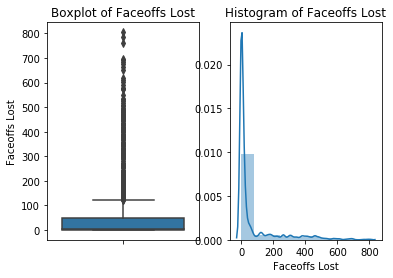

In [53]:
# define a new figure for plotting
plt.figure(1)
# define the plot that will appear on the left side
plt.subplot(121)
# create the box plot
sns.boxplot(nhl_18_19['Faceoffs Lost'], orient = 'v')
# set the title for the box plot
plt.title('Boxplot of Faceoffs Lost')
# clear the x label of box plot
plt.xlabel(' ')
# define the plot that will appear on the right side
plt.subplot(122)
# create the histogram
sns.distplot(nhl_18_19['Faceoffs Lost'], bins = 10)
# set the title for the histogram
plt.title('Histogram of Faceoffs Lost')
# show the plots
plt.show();

### Faceoffs % Column
To explore the Faceoffs % column, I created a histogram using both mathplotlib and seaborn. <br>
The histogram shows that the data is unimodal. <br>
Additionally, I found the median to be 45.45% which is greater than the mean, so the distribution is negatively skewed. 

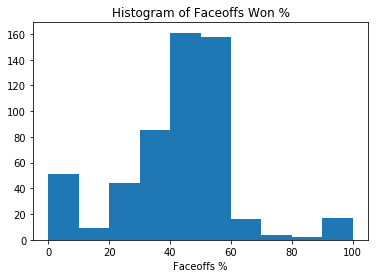

In [54]:
# create the histogram of Faceoffs % using hist method of mathplotlib.
plt.hist(nhl_18_19['Faceoffs %'])

# label the histogram
plt.title('Histogram of Faceoffs Won %')
plt.xlabel('Faceoffs %');

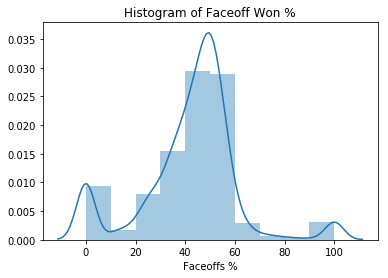

In [55]:
# create the histogram using distplot method of seaborn
sns.distplot(nhl_18_19['Faceoffs %'], bins = 10)
# set the title for the histogram
plt.title('Histogram of Faceoff Won %')
# show the plots
plt.show();

In [56]:
# Find the median of the Faceoffs % column
nhl_18_19['Faceoffs %'].median()

45.45

## Inference

After performing the EDA on all of the attributes in the dataset, I returned to my research questions:
    1. Does more minutes per game lead to more goals per game? 
    2. Does more minutes per game lead to more points per game?
In order to answer these questions, I made a copy of the dataset, and stored it in the nhl_18_19_copy variable. <br>
I then created three new columns in the dataset:
    1. Points Per Game - calculated by dividing Total Points by GP (games played).
    2. Goals Per Game - calculated by dividing Goals by GP (games played).
    3. Minutes Per Game - calculated by dividing TOI (time on ice) by GP (games played).
I then made scatter plots of Minutes Per Game vs. Goals Per Game and Minutes Per Game vs. Points Per Game using both mathplotlib and seaborn. <br>
I then calculated the correlation of each column in the dataset with the Minutes Per Game column. <br>
The correlations seemed low to me, and while the trend in the scatter plots was positively associated, I expected there to be a stronger positive association. <br>
So I created a subset of the data without Defensemen in it (as defensemen do not usually score a lot of goals or accrue a lot of points as they are primarily concerned with preventing other players from scoring), and created the scatter plots and found the correlation again on this subset of the data.

In [57]:
# Create a copy of nhl_18_19 dataframe.
nhl_18_19_copy = nhl_18_19.copy()

In [58]:
# Create Points Per Game column by dividing Total Points by GP
nhl_18_19_copy['Points Per Game'] = nhl_18_19_copy['Total Points']/nhl_18_19_copy['GP']
# Create Goals Per Game column by dividing Goals by GP
nhl_18_19_copy['Goals Per Game'] = nhl_18_19_copy['Goals']/nhl_18_19_copy['GP']
# Create Minutes Per Game column by dividing TOI by GP
nhl_18_19_copy['Minutes Per Game'] = nhl_18_19_copy['TOI']/nhl_18_19_copy['GP']

In [59]:
# Show first 5 rows of dataset with new columns.
nhl_18_19_copy.head()

,Player,Team,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,Faceoffs Won,Faceoffs Lost,Faceoffs %,Points Per Game,Goals Per Game,Minutes Per Game
403,Nikita Kucherov,T.B,R,69,1359.766667,33,77,50,27,110,85.27,206,16.02,0,3,0.00,1.594203,0.478261,19.706763
165,Patrick Kane,CHI,R,67,1513.016667,40,57,34,23,97,78.86,287,13.94,1,1,50.00,1.447761,0.597015,22.582338
677,Connor McDavid,EDM,C,64,1466.716667,33,63,47,16,96,82.76,202,16.34,357,403,46.97,1.500000,0.515625,22.917448
78,Sidney Crosby,PIT,C,65,1352.316667,31,56,42,14,87,73.11,189,16.40,808,663,54.93,1.338462,0.476923,20.804872
566,Nathan MacKinnon,COL,C,69,1516.433333,35,52,30,22,87,70.73,297,11.78,448,572,43.92,1.260870,0.507246,21.977295


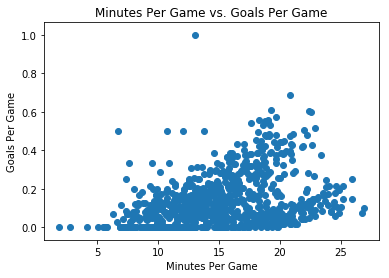

In [60]:
# Create a scatter plot of Minutes Per Game vs. Goals Per Game
# using scatter method of mathplotlib.
plt.scatter(nhl_18_19_copy['Minutes Per Game'], nhl_18_19_copy['Goals Per Game'])
# Set the title and labels of the scatter plot.
plt.title('Minutes Per Game vs. Goals Per Game')
plt.xlabel('Minutes Per Game')
plt.ylabel('Goals Per Game');

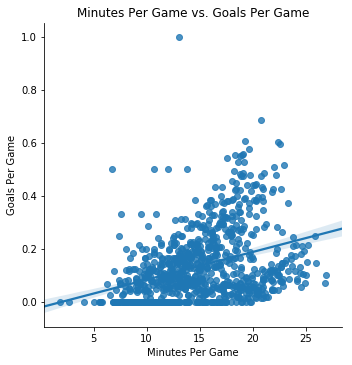

In [61]:
# Create a scatter plot of Minutes Per Game vs. Goals Per Game
# using lmplot method of seaborn.
sns.lmplot(x = 'Minutes Per Game', y = 'Goals Per Game', data = nhl_18_19_copy)
# Set the title and labels of the scatter plot.
plt.title('Minutes Per Game vs. Goals Per Game')
plt.xlabel('Minutes Per Game')
plt.ylabel('Goals Per Game');

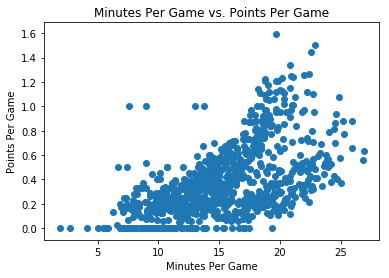

In [62]:
# Create a scatter plot of Minutes Per Game vs. Points Per Game
# using scatter method of mathplotlib.
plt.scatter(nhl_18_19_copy['Minutes Per Game'], nhl_18_19_copy['Points Per Game'])
# Set the title and labels of the scatter plot.
plt.title('Minutes Per Game vs. Points Per Game')
plt.xlabel('Minutes Per Game')
plt.ylabel('Points Per Game');

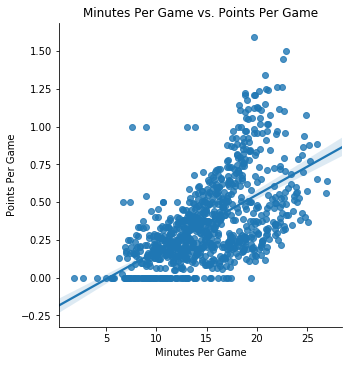

In [63]:
# Create a scatter plot of Minutes Per Game vs. Points Per Game
# using lmplot method of seaborn.
sns.lmplot(x = 'Minutes Per Game', y = 'Points Per Game', data = nhl_18_19_copy)
# Set the title and labels of the scatter plot.
plt.title('Minutes Per Game vs. Points Per Game')
plt.xlabel('Minutes Per Game')
plt.ylabel('Points Per Game');

In [64]:
# find correlation of attributes with Minutes Per Game
nhl_18_19_copy.corrwith(nhl_18_19_copy['Minutes Per Game'])

GP                  0.607430
TOI                 0.830703
Goals               0.446066
Total Assists       0.676770
First Assists       0.585847
Second Assists      0.717840
Total Points        0.621603
IPP                -0.129197
Shots               0.668542
SH%                 0.003710
Faceoffs Won        0.192791
Faceoffs Lost       0.187830
Faceoffs %         -0.026864
Points Per Game     0.574533
Goals Per Game      0.344472
Minutes Per Game    1.000000
dtype: float64

In [65]:
# Create subset of data where no player plays defense.
nhl_forwards = nhl_18_19_copy[nhl_18_19_copy['Position'] != 'D']

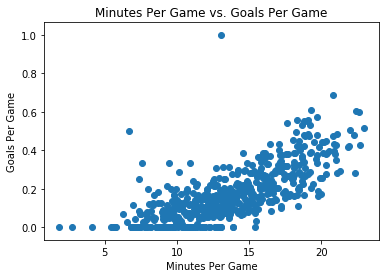

In [66]:
# Create a scatter plot of Minutes Per Game vs. Goals Per Game
# using scatter method of mathplotlib.
plt.scatter(nhl_forwards['Minutes Per Game'], nhl_forwards['Goals Per Game'])
# Set the title and labels of the scatter plot.
plt.title('Minutes Per Game vs. Goals Per Game')
plt.xlabel('Minutes Per Game')
plt.ylabel('Goals Per Game');

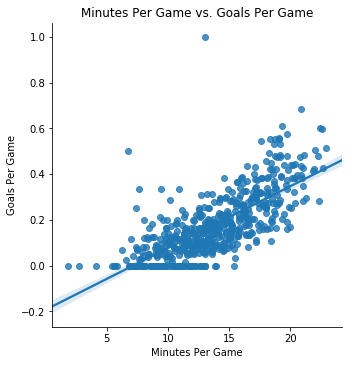

In [67]:
# Create a scatter plot of Minutes Per Game vs. Points Per Game
# using lmplot method of seaborn.
sns.lmplot(x = 'Minutes Per Game', y = 'Goals Per Game', data = nhl_forwards)
# Set the title and labels of the scatter plot.
plt.title('Minutes Per Game vs. Goals Per Game')
plt.xlabel('Minutes Per Game')
plt.ylabel('Goals Per Game');

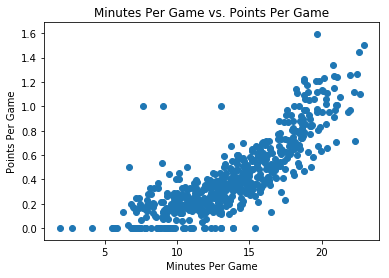

In [68]:
# Create a scatter plot of Minutes Per Game vs. Points Per Game
# using scatter method of mathplotlib.
plt.scatter(nhl_forwards['Minutes Per Game'], nhl_forwards['Points Per Game'])
# Set the title and labels of the scatter plot.
plt.title('Minutes Per Game vs. Points Per Game')
plt.xlabel('Minutes Per Game')
plt.ylabel('Points Per Game');

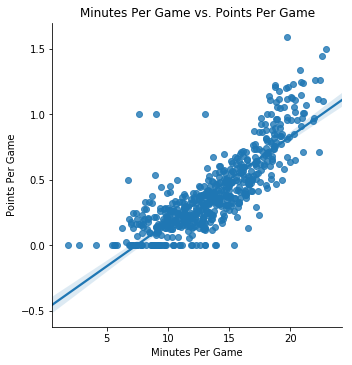

In [69]:
# Create a scatter plot of Minutes Per Game vs. Points Per Game
# using lmplot method of seaborn.
sns.lmplot(x = 'Minutes Per Game', y = 'Points Per Game', data = nhl_forwards)
# Set the title and labels of the scatter plot.
plt.title('Minutes Per Game vs. Points Per Game')
plt.xlabel('Minutes Per Game')
plt.ylabel('Points Per Game');

In [70]:
# find correlation of attributes with Minutes Per Game
nhl_forwards.corrwith(nhl_forwards['Minutes Per Game'])

GP                  0.679281
TOI                 0.865687
Goals               0.805749
Total Assists       0.813295
First Assists       0.780224
Second Assists      0.785021
Total Points        0.847444
IPP                 0.178825
Shots               0.843887
SH%                 0.228643
Faceoffs Won        0.511901
Faceoffs Lost       0.526051
Faceoffs %          0.087789
Points Per Game     0.823532
Goals Per Game      0.730981
Minutes Per Game    1.000000
dtype: float64

## Conclusion
To return to the research questions that we started with:
    1. Does more minutes per game lead to more goals per game? <br>
    
From the first scatter plot, containing all players, it appears that there is a slight positive association between minutes per game and goals per game. <br>
This implies that playing more minutes would lead to scoring more goals, but the trend line (as shown in the seaborn plot) has a small slope, so we would not expect there to be such a large increase in goals per game if a player played more minutes. <br>
Additionally, the correlation between minutes per game and goals per game was only 0.34 implying that they are not strongly correlated. <br>
However, when testing this hypothesis on the subset of the data containing only offensive players, the scatter plot seems to imply a stronger postivive association. <br>
The trendline has a larger slope than before, and the correlation coefficient is now 0.73, which implies a strong correlation. <br>
So it would appear that we would expect a player to score more goals per game, if the player played more minutes per game. 
    2. Does more minutes per game lead to more points per game?
From the first scatter plot, containing all players, it appears that there is a slight positive association between minutes per game and points per game, although a larger association than with goals per game. <br>
Based on the slope of the trend line (as shown in the seaborn plot) we would expect a player who plays 25 minutes to score about 0.75 points per game. <br>
Additionally, the correlation between minutes per game and points per game was only 0.57 implying that they are relatively strongly correlated. <br>
However, when testing this hypothesis on the subset of the data containing only offensive players, the scatter plot seems to imply an even stronger postivive association. <br>
The trendline has a larger slope than before, we expect a player who plays 25 minutes to score about 1.0 points per game, and the correlation coefficient is now 0.82, which implies a very strong correlation. <br>
So it would appear that we would expect a player to score more points per game, if the player played more minutes per game. <br>
In conclusion, we would expect players to score more points per game than goals per game given more minutes per game, which makes sense given that goals are a component of points (points are goals + assists).


## Outside References
In order to learn about IPP, I found this article from TSN to be helpful. <https://www.tsn.ca/individual-point-percentage-what-it-is-how-we-can-apply-it-and-how-gms-can-exploit-it-1.350670> <br>
The glossary at Natural Stat Trick was also a helpful resource. <https://www.naturalstattrick.com/glossary.php?players>